In [7]:
import pandas as pd
import numpy as np
import sys
import guppy
from guppy import hpy
import time
import matplotlib.pyplot as plt

In [19]:
input_file = '/Users/lukenelson/Desktop/CSCI 570 - Analysis of Algorithms/Final Project/plot_files/input5.txt'



In [20]:
def read_file(input_file):
    # Open input file and determine base_string_X with its indices and base_string_Y with its indices
    txt = open(input_file, "r")

    first_line = True
    X_switch = True

    base_string_X = None
    base_string_Y = None
    X_indices = []
    Y_indices = []

    for line in txt:
        line = line.rstrip()

        if first_line == True:
            base_string_X = line
            first_line = False

        elif X_switch == True:
            try:
                line = int(line)
                X_indices.append(line)
            except:
                base_string_Y = line
                X_switch = False
        else:
            try:
                Y_indices.append(int(line))
            except:
                break

    txt.close()
    
    return {'base_string_X': base_string_X, 
           'base_string_Y': base_string_Y, 
           'X_indices': X_indices, 
           'Y_indices': Y_indices}


# Generate full strings
def generate_string(base, indices):
    cumulative = base
    
    for i in indices:
        cumulative = cumulative[:i + 1] + cumulative + cumulative[i + 1:]
        
    return cumulative

In [21]:
# Read in file
file_data = read_file(input_file)
base_string_X = file_data['base_string_X']
base_string_Y = file_data['base_string_Y']
X_indices = file_data['X_indices']
Y_indices = file_data['Y_indices']

# Generate Strings
X = generate_string(base_string_X, X_indices)
Y = generate_string(base_string_Y, Y_indices)

In [22]:
problem_size = len(X) + len(Y)
print('Problem Size:', problem_size)

Problem Size: 1536


In [30]:
memory_plot = {'filename':['input1.txt', 'input2.txt', 'input3.txt', 'input4.txt', 'input5.txt'], 
         'Size': [128, 96, 2048, 1280, 1536], 
         'Basic': [157.822, 79.034, 38667.128000000004, 9691.866, 19349.236], 
         'Efficient': [557.822, 579.034, 8667.128000000004, 691.866, 1349.236]}

time_plot = {'filename':['input1.txt', 'input2.txt', 'input3.txt', 'input4.txt', 'input5.txt'], 
         'Size': [128, 96, 2048, 1280, 1536], 
         'Basic': [0.002511739730834961, 0.0012788772583007812, 0.6423680782318115, 0.1524660587310791, 0.31272292137145996], 
            'Efficient': [0.004511739730834961, 0.0042788772583007812, 0.4423680782318115, 0.4524660587310791, 0.41272292137145996]}



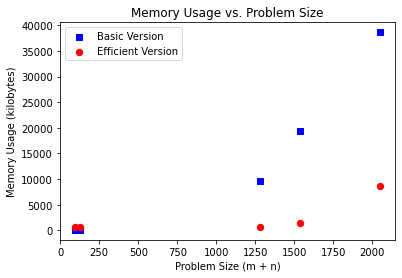

In [36]:
# Memory Usage Plot

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(memory_plot['Size'], memory_plot['Basic'], s=40, c='b', marker="s", label='Basic Version')
ax1.scatter(memory_plot['Size'],memory_plot['Efficient'], s=40, c='r', marker="o", label='Efficient Version')
plt.legend(loc='upper left');
plt.title('Memory Usage vs. Problem Size')
plt.xlabel('Problem Size (m + n)')
plt.ylabel('Memory Usage (kilobytes)')
plt.savefig('MemoryPlot.jpg')
#plt.show()

In [34]:
plt.savefig('MemoryPlot.png')

<Figure size 432x288 with 0 Axes>

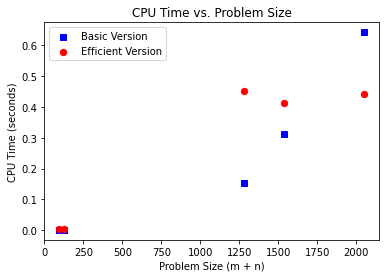

In [32]:
# CPU Time Plot

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(time_plot['Size'], time_plot['Basic'], s=40, c='b', marker="s", label='Basic Version')
ax1.scatter(time_plot['Size'],time_plot['Efficient'], s=40, c='r', marker="o", label='Efficient Version')
plt.legend(loc='upper left');
plt.title('CPU Time vs. Problem Size')
plt.xlabel('Problem Size (m + n)')
plt.ylabel('CPU Time (seconds)')
plt.show()

In [ ]:
plt.savefig('CPUPlot.jpg')